[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001
 0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019 0.002
 0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029 0.003
 0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037 0.0038 0.0039 0.004
 0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047 0.0048 0.0049 0.005
 0.0051 0.0052 0.0053 0.0054 0.0055 0.0056 0.0057 0.0058 0.0059 0.006
 0.0061 0.0062 0.0063 0.0064 0.0065 0.0066 0.0067 0.0068 0.0069 0.007
 0.0071 0.0072 0.0073 0.0074 0.0075 0.0076 0.0077 0.0078 0.0079 0.008
 0.0081 0.0082 0.0083 0.0084 0.0085 0.0086 0.0087 0.0088 0.0089 0.009
 0.0091 0.0092 0.0093 0.0094 0.0095 0.0096 0.0097 0.0098 0.0099 0.01
 0.0101 0.0102 0.0103 0.0104 0.0105 0.0106 0.0107 0.0108 0.0109 0.011
 0.0111 0.0112 0.0113 0.0114 0.0115 0.0116 0.0117 0.0118 0.0119 0.012
 0.0121 0.0122 0.0123 0.0124 0.0125 0.0126 0.0127 0.0128 0.0129 0.013
 0.0131 0.0132 0.0133 0.0134 0.0135 0.0136 0.0137 0.0138 0.0139 0.014
 0.0141 0.0142 0.0143

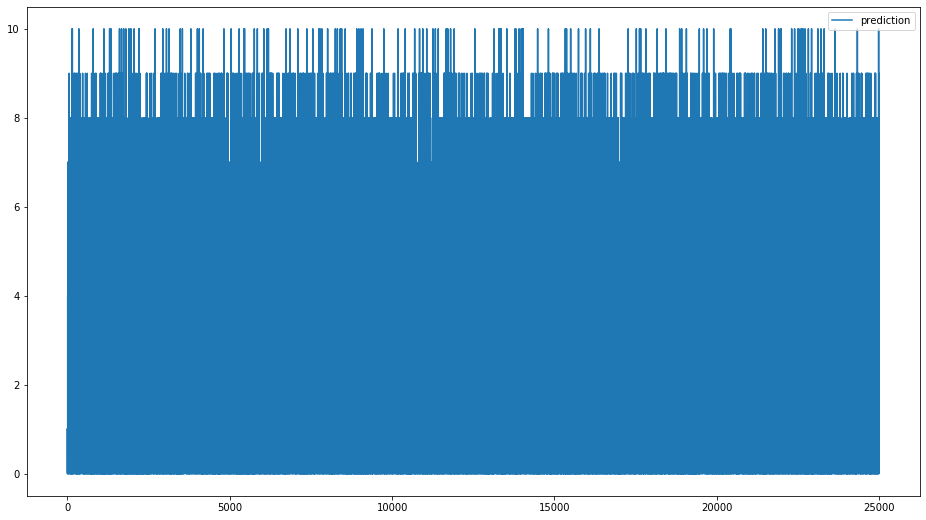

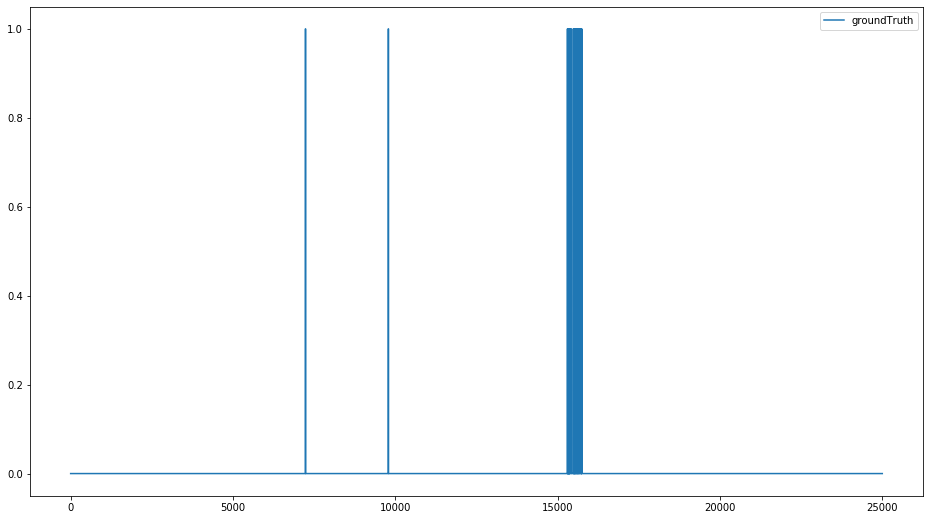

In [6]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
        


import os
import numpy
import time
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Activation, LSTM, BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import math
#from tensorflow_addons.metrics import F1Score

def prediction_csv(time, array, output_csv):
    temp_dataset = pd.DataFrame({'time':time.tolist(),'open_channels':array.tolist()})
    temp_dataset['time'] = temp_dataset['time'].apply(lambda x: format(x,'.4f'))
    #temp_dataset['open_channels'] = temp_dataset['open_channels'].apply(lambda x: int(x))
    temp_dataset.to_csv(output_csv, index=False)

batch_size = 1024

df = pd.read_csv('train_clean.csv', header=None, skiprows=1)

dataset = df.values.astype('float64')
groundTruth = dataset[:, 2].astype('int')
in_time = dataset[:,0]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
in_train = dataset[:,1]
in_train = shuffle(in_train)
in_train = in_train.reshape(len(in_train), 1, 1, 1)


newmodel = load_model('v0.h5')


predict = newmodel.predict_classes(in_train, batch_size=batch_size)
#predict = predict.reshape(5000000,1)


#predict = newmodel.predict(in_train, batch_size=batch_size)
#predict = np.argmax((predict), axis=1)


prediction_csv(in_time, predict, 'output.csv')

#print(predict[:25])
#print(groundTruth[:25])

plt.figure(figsize=(16, 9))
plt.plot(predict[:25000], label="prediction")
plt.legend()
plt.savefig('prediction.pdf')

plt.figure(figsize=(16, 9))
plt.plot(groundTruth[:25000], label="groundTruth")
plt.legend()
plt.savefig('groundTruth.pdf')